# Разделительная кластеризация

In [17]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# импортируем набор данных
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [110]:
X = df.iloc[:, [5, 9, 1, 2]].values
X

array([[ 38.    ,  71.2833,   1.    ,   1.    ],
       [ 38.5   ,  53.1   ,   1.    ,   1.    ],
       [ 59.4   ,  51.8625,   0.    ,   1.    ],
       [  4.    ,  16.7   ,   1.    ,   3.    ],
       [ 63.8   ,  26.55  ,   1.    ,   1.    ],
       [ 37.4   ,  13.    ,   1.    ,   2.    ],
       [ 28.    ,  35.5   ,   1.    ,   1.    ],
       [ 19.    , 263.    ,   0.    ,   1.    ],
       [ 49.    ,  76.7292,   1.    ,   1.    ],
       [ 65.    ,  61.9792,   0.    ,   1.    ],
       [ 45.    ,  83.475 ,   0.    ,   1.    ],
       [ 29.    ,  10.5   ,   1.    ,   2.    ],
       [ 25.    ,   7.65  ,   0.    ,   3.    ],
       [ 23.    , 263.    ,   1.    ,   1.    ],
       [ 50.6   ,  61.175 ,   0.    ,   1.    ],
       [ 71.    ,  34.6542,   0.    ,   1.    ],
       [ 25.3   ,  63.3583,   1.    ,   1.    ],
       [ 21.    ,  77.2875,   0.    ,   1.    ],
       [ 47.    ,  52.    ,   0.    ,   1.    ],
       [ 24.    , 247.5208,   0.    ,   1.    ],
       [ 35.75  ,  1

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 22.7+ KB


In [103]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,36.886175,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,16.409631,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,25.650000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,49.000000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [22]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
df = df.dropna()

In [45]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
# correl=df.corr()
# sns.heatmap(correl,annot=True)

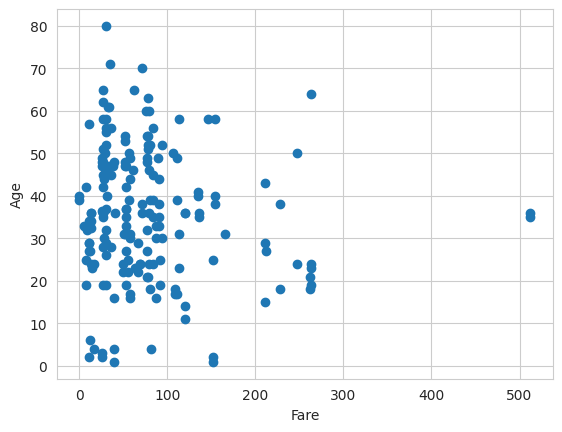

In [46]:
x_axis = df.Fare.values 
y_axis = df.Age.values 

plt.xlabel(df.columns.values[9])
plt.ylabel(df.columns.values[5])
plt.scatter(x_axis, y_axis)
plt.show()

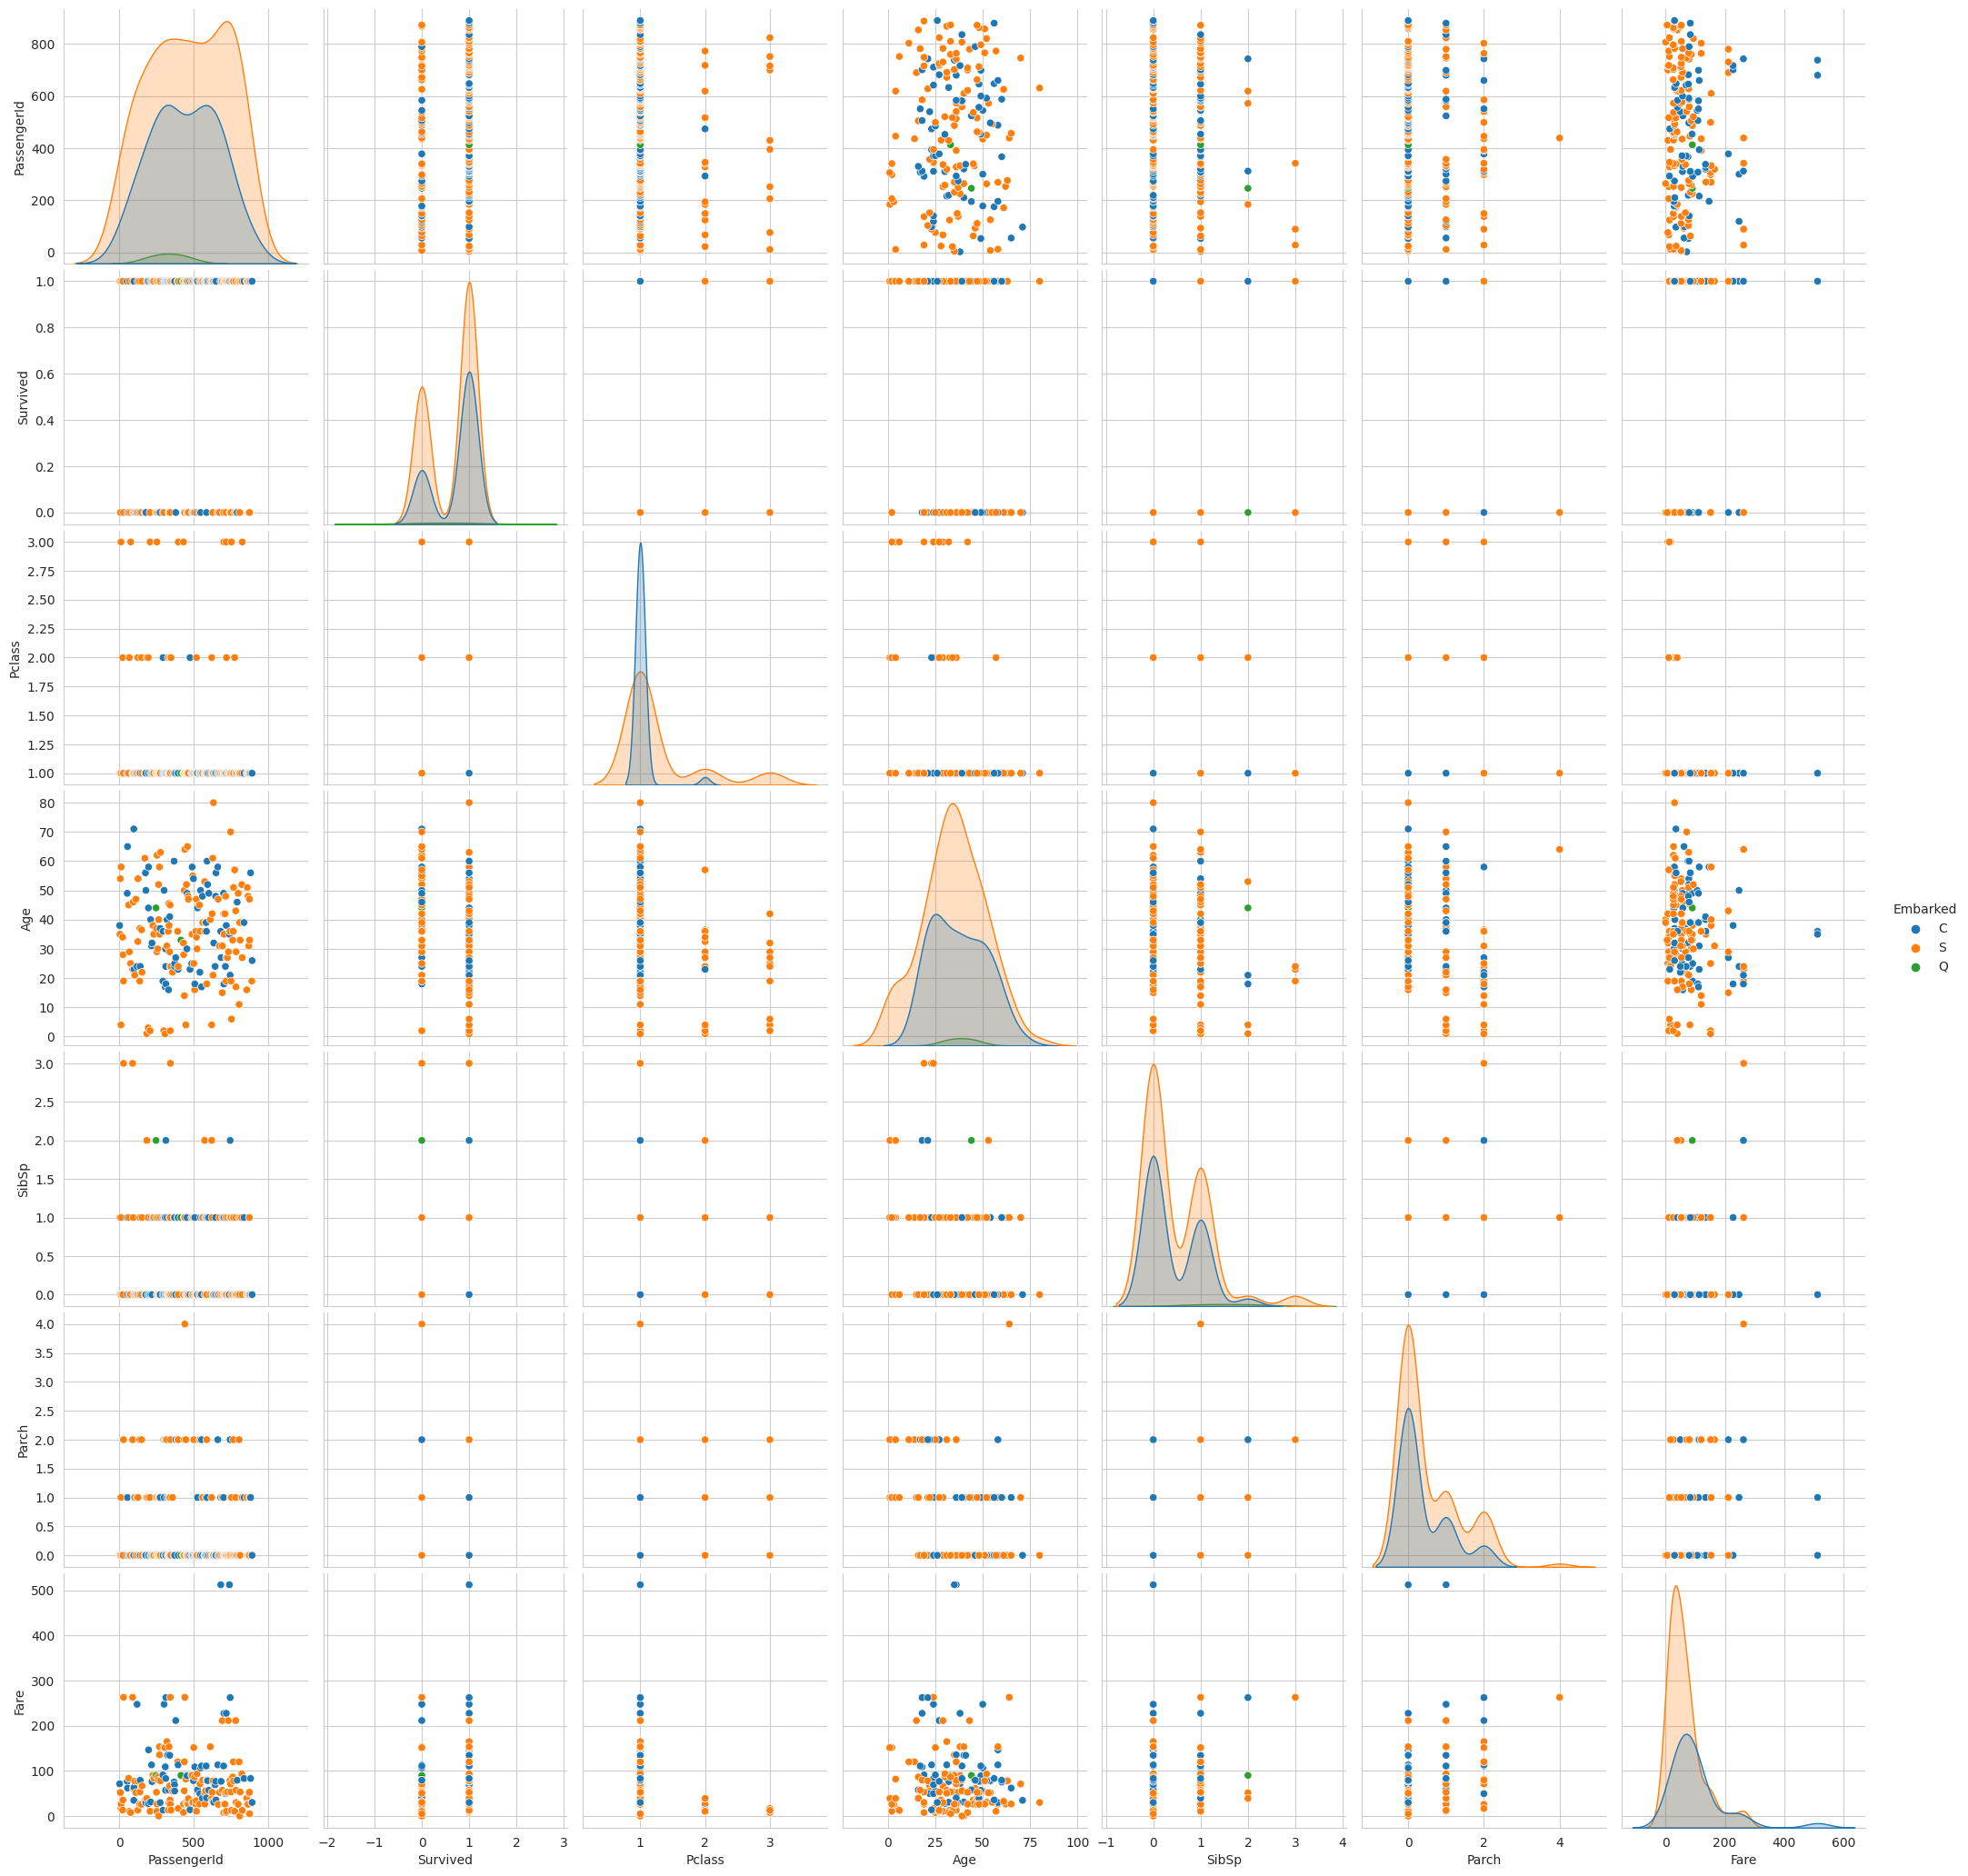

In [47]:
import seaborn as sns

sns.set_style("whitegrid")
sns.pairplot(df,hue="Embarked",size=3);
plt.show()

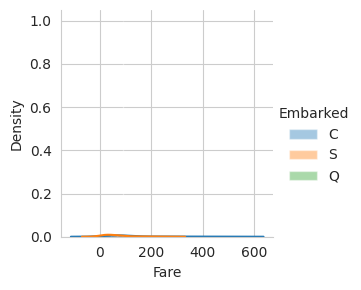

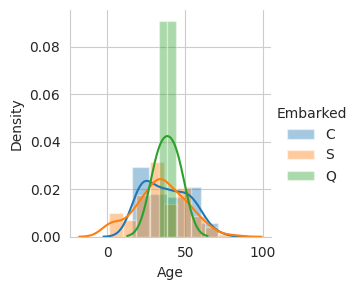

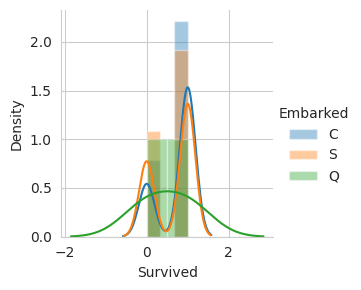

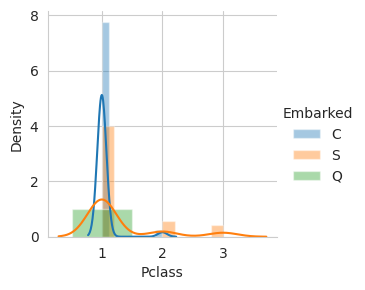

In [48]:
sns.FacetGrid(df,hue="Embarked").map(sns.distplot,"Fare").add_legend()
sns.FacetGrid(df,hue="Embarked").map(sns.distplot,"Age").add_legend()
sns.FacetGrid(df,hue="Embarked").map(sns.distplot,"Survived").add_legend()
sns.FacetGrid(df,hue="Embarked").map(sns.distplot,"Pclass").add_legend()

plt.show()

In [49]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


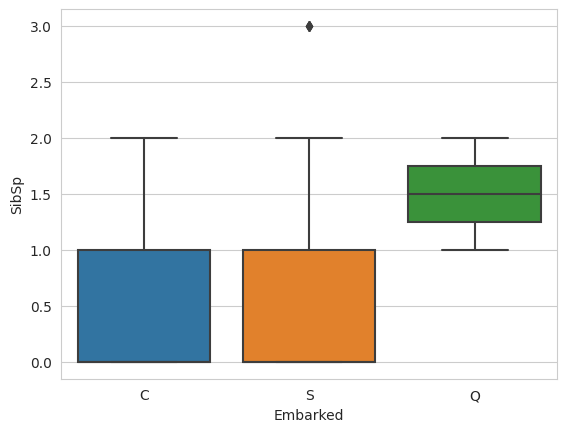

In [50]:
sns.boxplot(x="Embarked",y="SibSp",data=df)
plt.show()

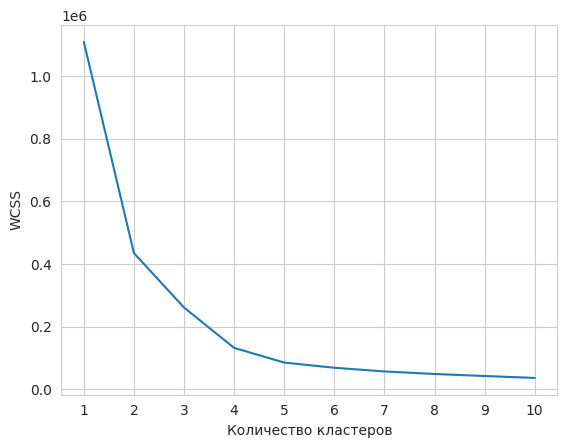

In [111]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Количество кластеров")
plt.ylabel("WCSS")
plt.show()

In [112]:
kmeans = KMeans(n_clusters = 3,
                 max_iter = 300,
                random_state = 1)

y_kmeans = kmeans.fit_predict(X)

In [113]:
y_kmeans

array([0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2], dtype=int32)

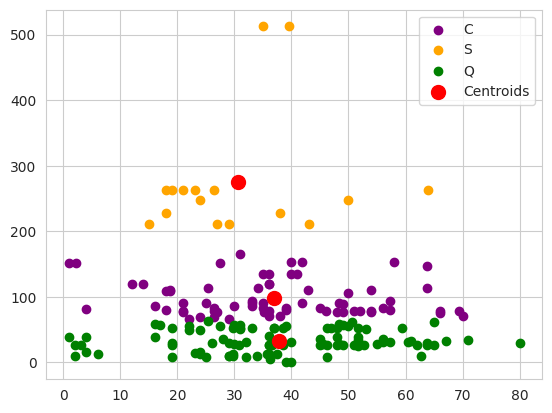

In [114]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'purple', label = 'C')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'orange', label = 'S')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Q')

# Plotting 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [117]:
kmeans = KMeans(n_clusters = 4,
                # max_iter = 300
                random_state = 1)

y_kmeans = kmeans.fit_predict(X)

In [118]:
y_kmeans

array([0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 0, 2, 2, 3, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 3,
       0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2], dtype=int32)

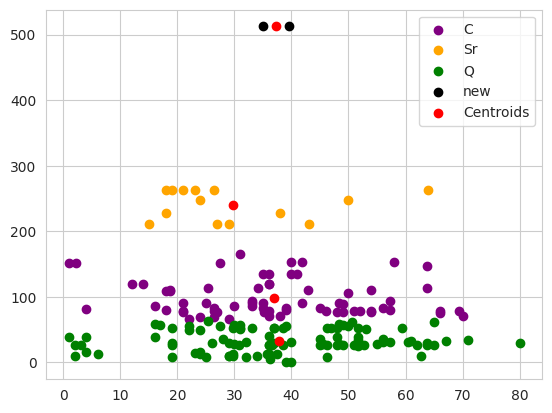

In [119]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'purple', label = 'C')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'orange', label = 'Sr')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Q')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'black', label = 'new')


#Plotting
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'red', label = 'Centroids')

plt.legend()

In [145]:
# импортируем набор данных
df = pd.read_csv('titanic.csv')

In [146]:
df = df.dropna()

In [147]:
change = df.sample(50).index
change

Int64Index([715, 310, 456, 871, 438, 737, 309, 716, 763, 118, 305, 505, 319,
             21, 460, 462, 699, 124, 498, 262, 536, 889, 872,  96,  11, 340,
            275, 759, 823, 269, 707, 796, 452, 781, 394, 393, 609, 710, 209,
            194, 430, 512, 449, 341, 618, 252, 268, 523, 215, 484],
           dtype='int64')

In [148]:
df.loc[change,'Age'] = df.loc[change,'Age']*11


In [149]:
X = df.iloc[:, [5, 9, 1, 2]].values

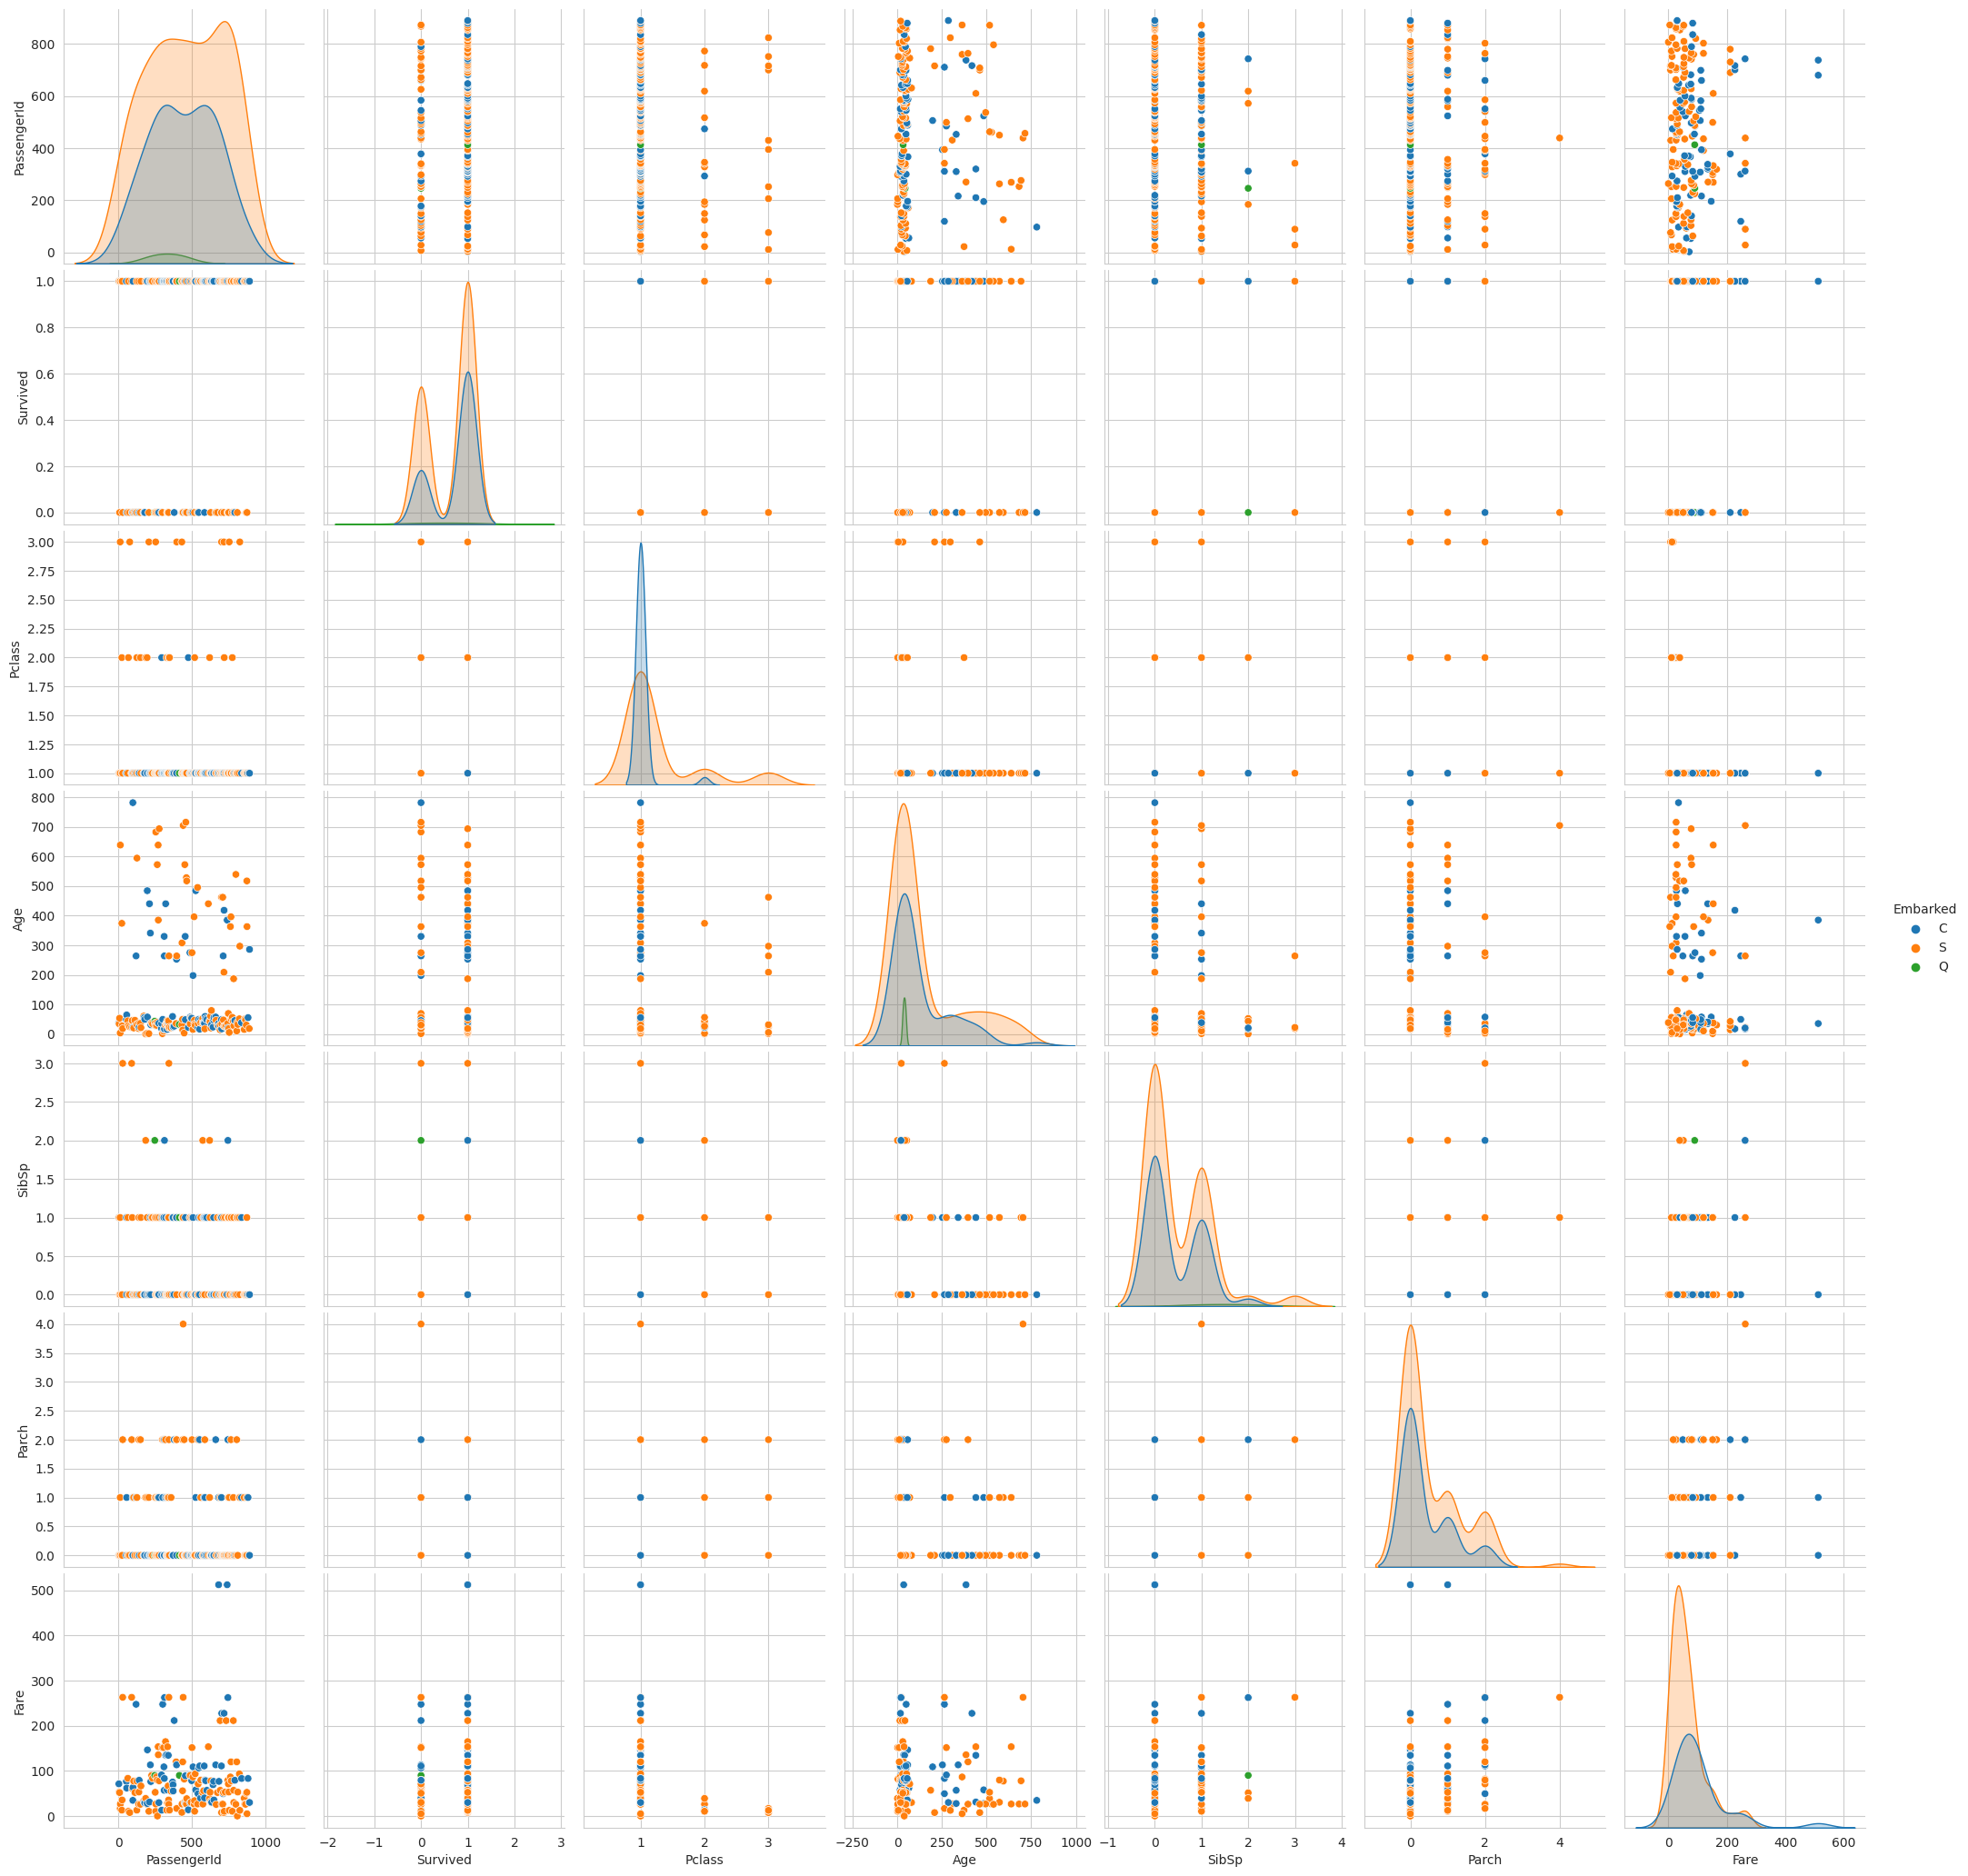

In [150]:
import seaborn as sns

sns.set_style("whitegrid")
sns.pairplot(df,hue="Embarked",size=3);
plt.show()

In [151]:
kmeans = KMeans(n_clusters = 3,
                 max_iter = 300,
                random_state = 1)

y_kmeans = kmeans.fit_predict(X)

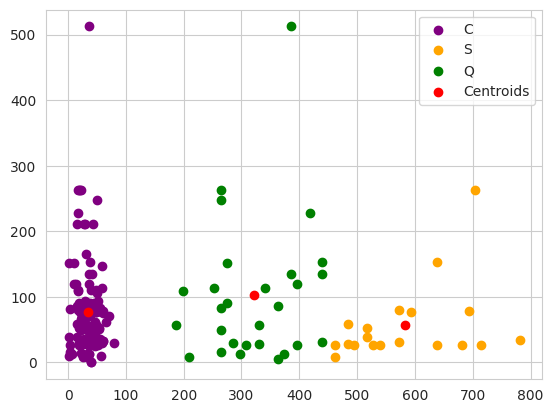

In [152]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            c='purple', label='C')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            c='orange', label='S')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            c='green', label='Q')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], c='red', label='Centroids')

plt.legend()

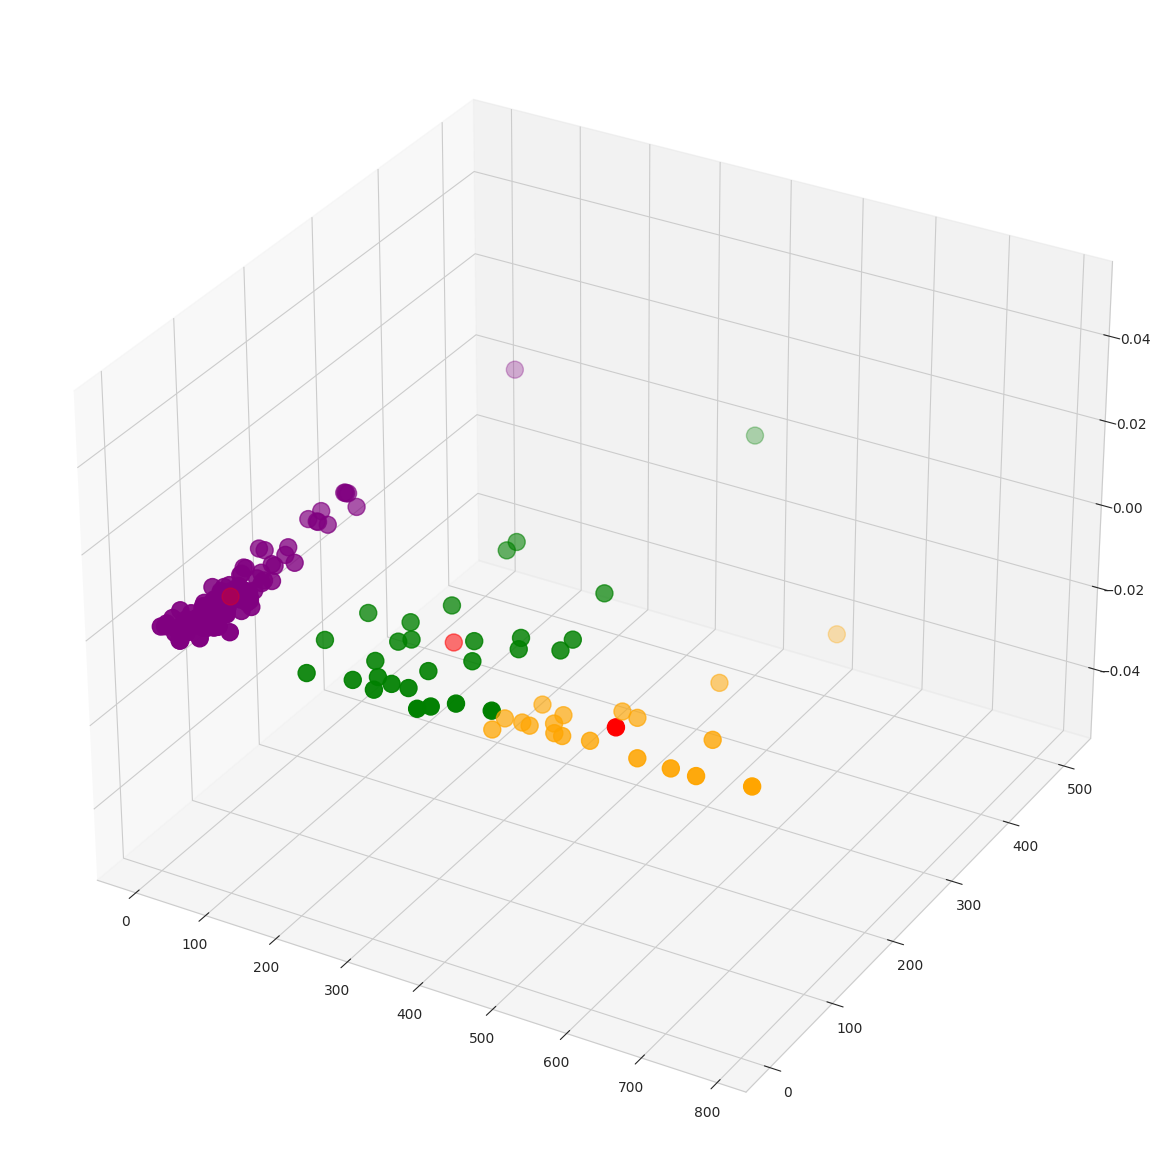

In [154]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s=150, c='purple', label='C')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            s=150, c='orange', label='S')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s=150, c='green', label='Q')

# Plotting
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=150, c='red', label='Centroids')

plt.show()

In [131]:
!pip install scikit-learn-extra


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.7 MB/s eta 0:00:00


In [155]:
from sklearn_extra.cluster import KMedoids

In [156]:
cobj = KMedoids(n_clusters=3).fit(X)
labels = cobj.labels_

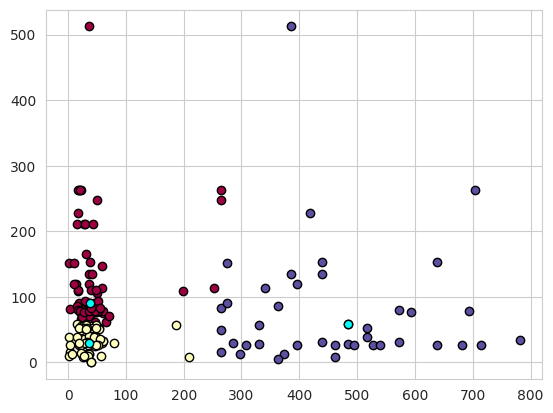

In [157]:
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):
    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.plot(
    cobj.cluster_centers_[:, 0],
    cobj.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)


Выполните кластеризацию набора данных из задания о плотностной кластеризации (с невыпуклыми кластерами) с помощью алгоритмов k‑Means и k‑Medoids (или PAM), используя различные значения параметра  (из интервала 3..9). Выполните визуализацию полученных результатов в виде точечных графиков, на которых цвет точки отражает принадлежность кластеру.

In [158]:
df = pd.read_csv('titanic.csv')

In [159]:
df = df.dropna()

In [160]:
X = df.iloc[:, [5, 9, 1, 2]].values

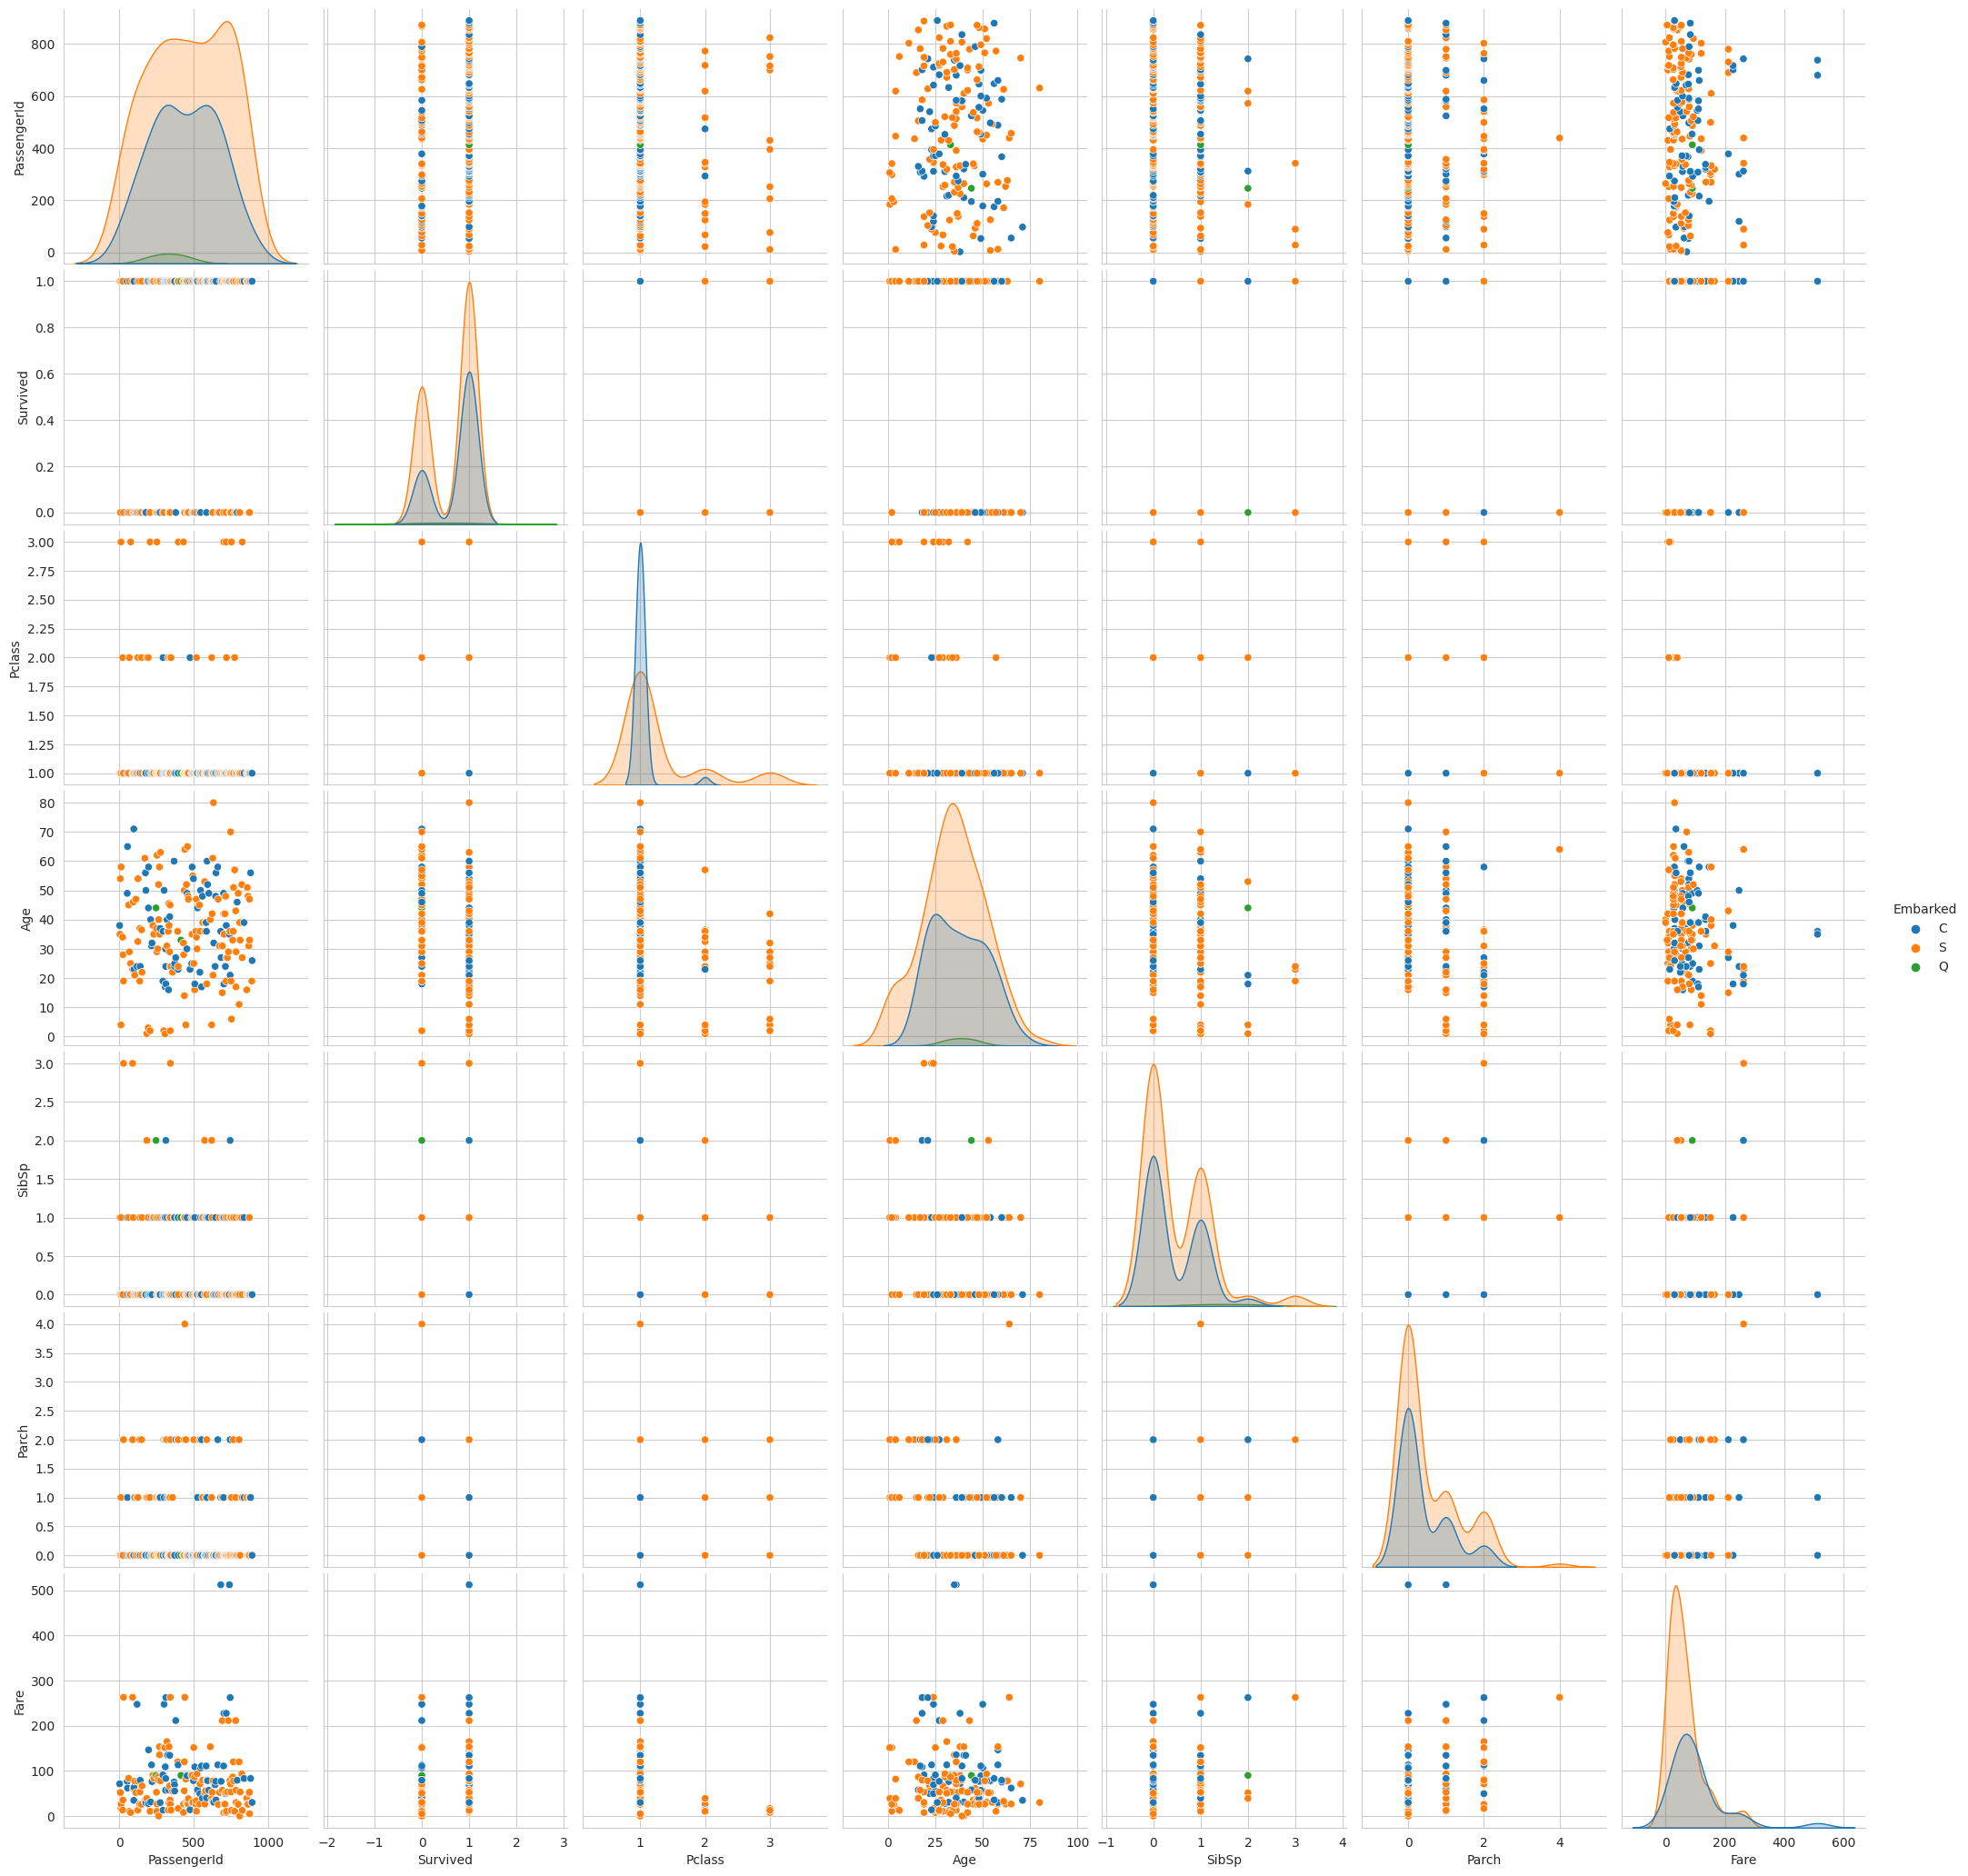

In [161]:
import seaborn as sns

sns.set_style("whitegrid")
sns.pairplot(df,hue="Embarked",size=3);
plt.show()

In [162]:
kmeans = KMeans(n_clusters = 3,
                # max_iter = 300,
                random_state = 1)

y_kmeans = kmeans.fit_predict(X)

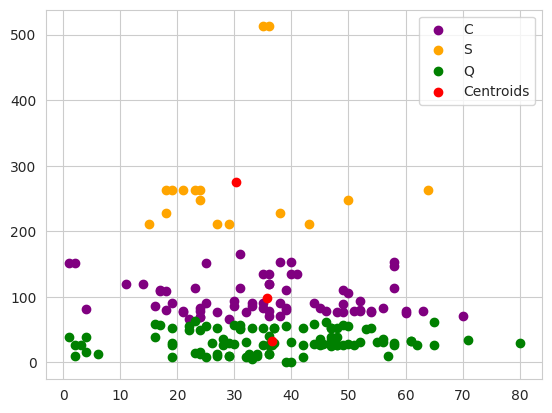

In [163]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c='purple', label='C')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c='orange', label='S')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c='green', label='Q')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', label='Centroids')

plt.legend()

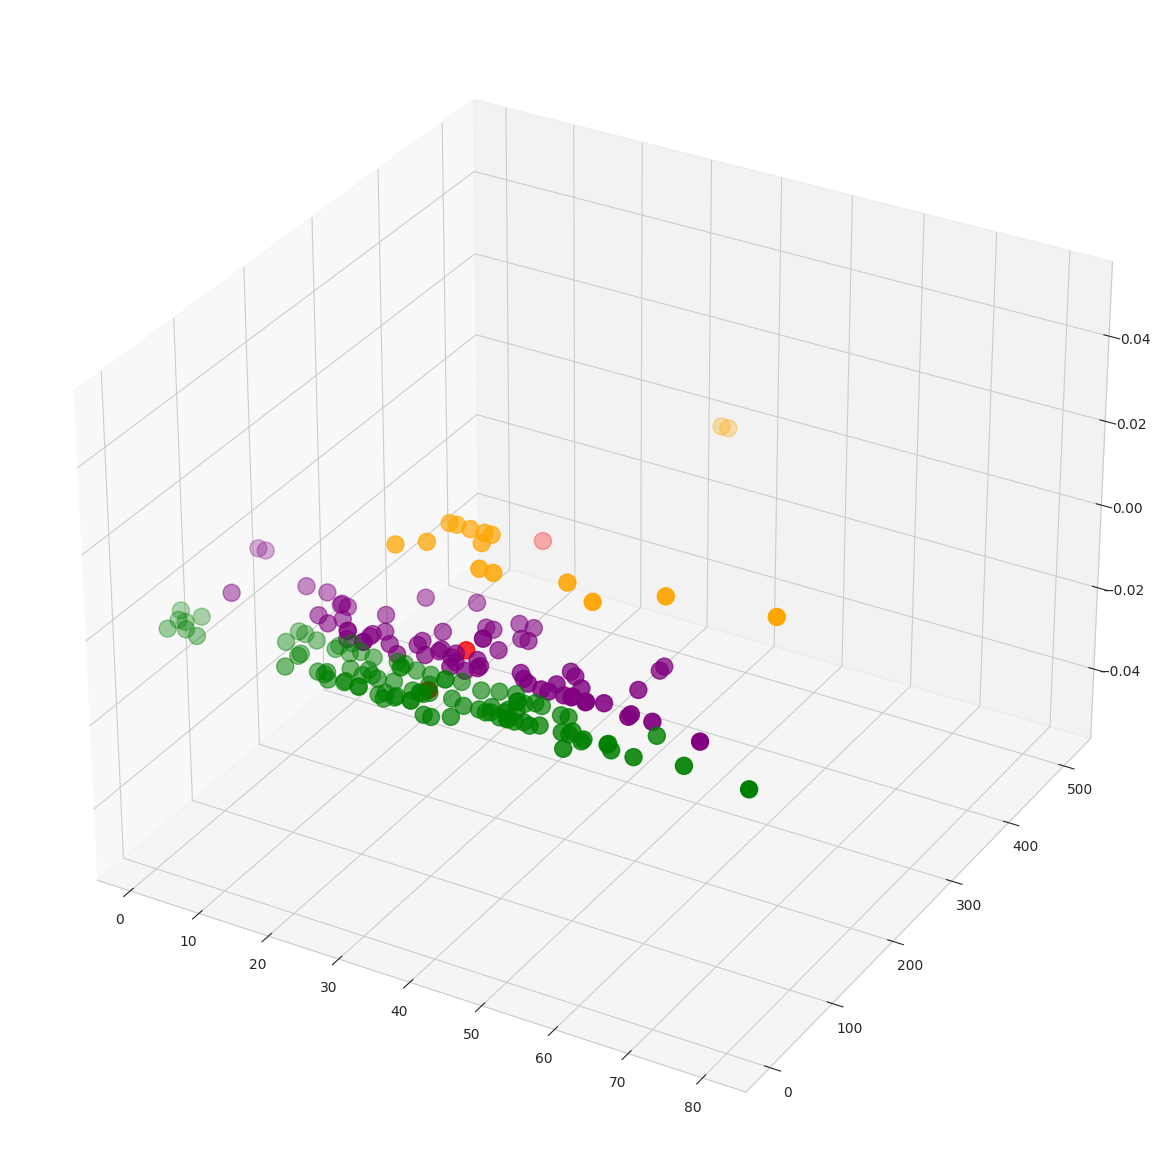

In [164]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=150, c='purple', label='C')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=150, c='orange', label='S')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=150, c='green', label='Q')

# Plotting
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='red', label='Centroids')

plt.show()

In [165]:
cobj = KMedoids(n_clusters=3).fit(X)
labels = cobj.labels_

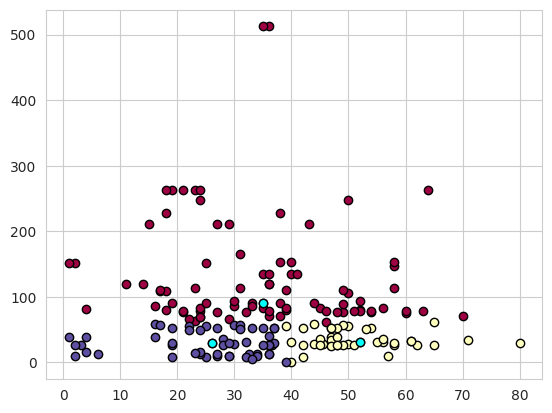

In [166]:
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):
    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.plot(
    cobj.cluster_centers_[:, 0],
    cobj.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)
